In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import matplotlib.patches as mpatches

# Bout Bar Plot

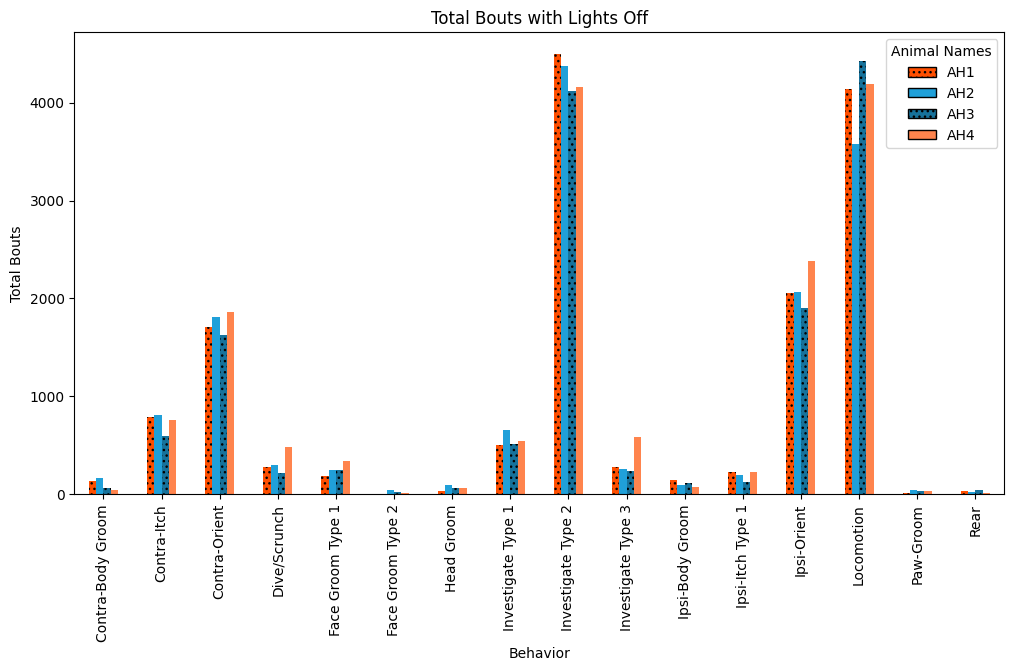

In [3]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = int(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns])
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars

    plt.title('Total Bouts with Lights Off')
    plt.xlabel('Behavior')
    plt.ylabel('Total Bouts')
    
    # Define the order of animal names
    animal_order = ['AH1', 'AH2', 'AH3', 'AH4']

    # Create a legend with labels and hatching patterns
    legend_handles = []

    for animal in animal_order:
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch='...' if animal == 'AH1' else '...' if animal == 'AH3' else '')

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()


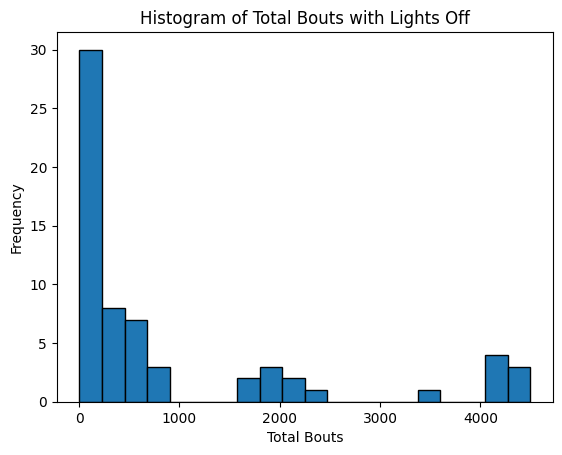

In [4]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = int(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    values = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                values.append(value)

    plt.hist(values, bins=20, edgecolor='k')
    
    plt.title('Histogram of Total Bouts with Lights Off')
    plt.xlabel('Total Bouts')
    plt.ylabel('Frequency')

    plt.show()

root.destroy()


# Average Duration Bar Plot

In [ ]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = float(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns])
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars

    plt.title('Average Duration with Lights Off')
    plt.xlabel('Behavior')
    plt.ylabel('Average Duration')
    
    # Define the order of animal names
    animal_order = ['AH1', 'AH2', 'AH3', 'AH4']

    # Create a legend with labels and hatching patterns
    legend_handles = []

    for animal in animal_order:
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch='...' if animal == 'AH1' else '...' if animal == 'AH3' else '')

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()
